In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
df = pd.read_csv('height-weight.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [6]:
X = df[['Weight']]
y = df['Height']


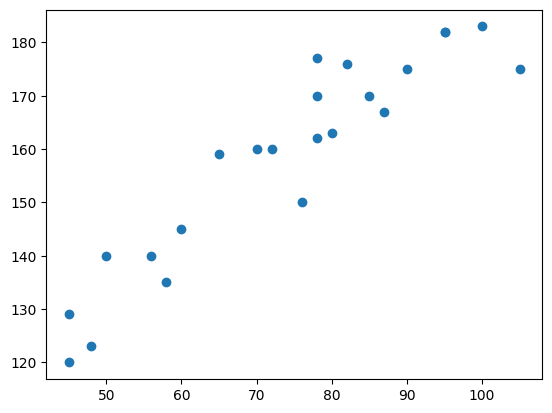

In [7]:
plt.scatter(X, y)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train.shape , y_train.shape

((18, 1), (18,))

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
X_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

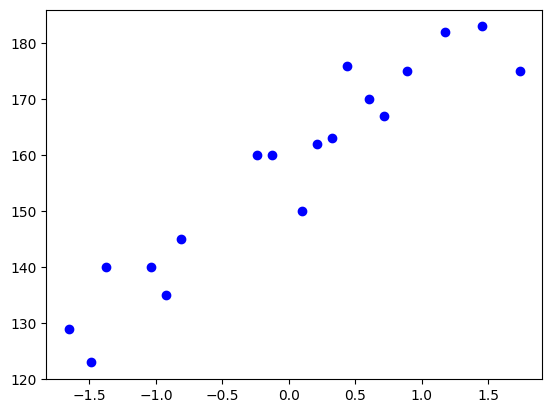

In [14]:
plt.scatter(X_train, y_train, color='blue', label='Training data')

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


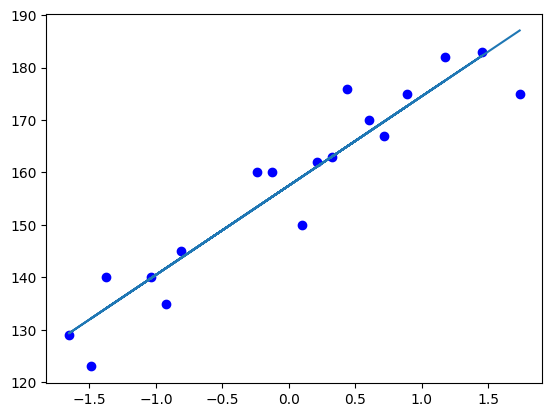

In [18]:
plt.plot( X_train, model.predict(X_train))
plt.scatter(X_train, y_train, color='blue', label='Training data')

In [19]:
y_test_pred = model.predict(X_test)


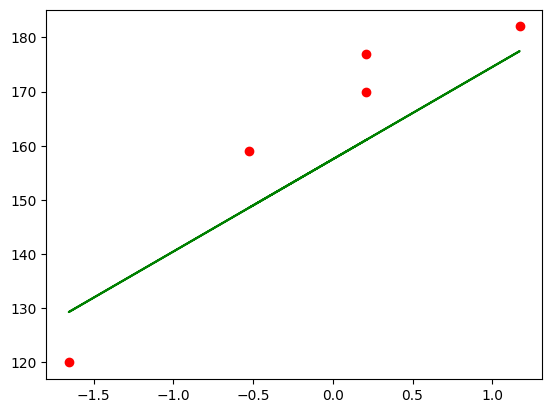

In [24]:
plt.scatter( X_test, y_test, color='red', label='Test predictions')
plt.plot(X_test, model.predict(X_test), color='green', label='Model predictions')

In [25]:
scaled_weight = scaler.transform([[70]])  # Example weight
predicted_height = model.predict(scaled_weight)
print(f"Predicted height for weight 70kg: {predicted_height[0]} cm")

Predicted height for weight 70kg: 153.38030364312561 cm


/Users/fakhirhassan/Downloads/CASTER-master/.conda/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


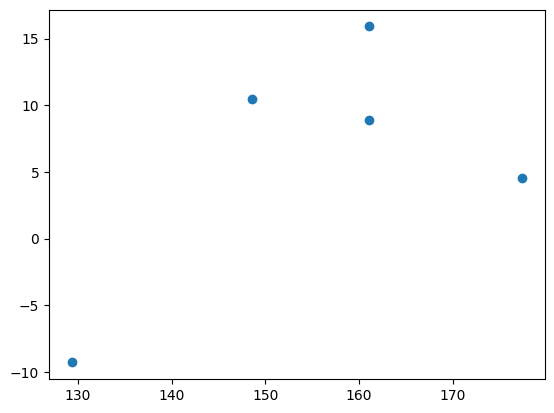

In [28]:
residual = y_test - y_test_pred
plt.scatter(y_test_pred, residual)

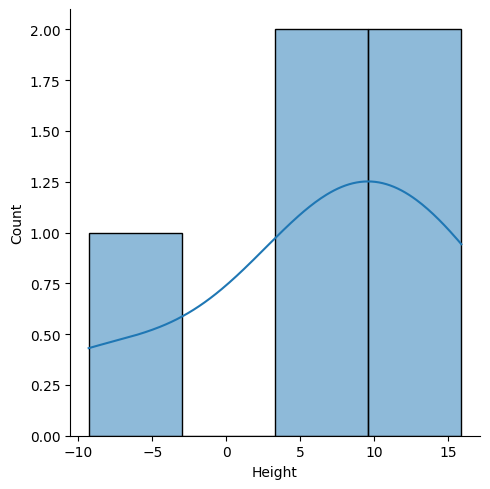

In [29]:
sns.displot(residual, kde=True)

In [30]:
residual

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64